<a href="https://colab.research.google.com/github/siva-sankar-a/eva/blob/master/S9/EVA4_Session_9_DA_and_GradCam_with_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S9 _Assignment 9_

  | Summary of overall targets |  |
  | - | - |
  | _Dataset_| **CIFAR10** |
  | _Max. number of epochs_| **NA** |
  | _Max. number of parameters_| **NA** |
  | _Architecture_| **Resnet18** |
  | _Target accurracy_| **87%** |


# Implementation

## Initialization

### Mounting google drive to save results

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install torchsummary
!pip install torchviz

In [3]:
import glob
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
import torch
import torchvision
import numpy as np

from torch.nn import functional as F
import cv2

In [4]:
!rm -rf eva
!git clone "https://github.com/siva-sankar-a/eva.git"

Cloning into 'eva'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 327 (delta 15), reused 23 (delta 7), pack-reused 291
Receiving objects: 100% (327/327), 4.70 MiB | 7.49 MiB/s, done.
Resolving deltas: 100% (172/172), done.


In [0]:
%load_ext autoreload
%autoreload 2
from eva.S9.api import Experiment
from eva.S9.data_manager.data_manager_albumentations import  DataManager
from eva.S9.viz import viz_cifar10_grid_
from eva.S9.utils import textual_summary_cifar10, graphical_summary_cifar10
from eva.S9.settings import cifar10_classes
from eva.S9.models.model_s9 import ResNet, ResNet18
from eva.S9.grad_cam.grad_cam import GradCam

### Create an instance of experiment class

In [6]:
experiment = Experiment(name=f'default', dataset_name='cifar10')

CUDA status: True
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  cat   car  deer horse


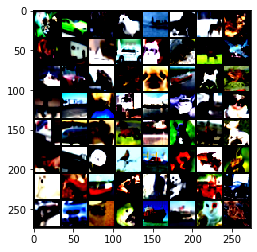

In [7]:
viz_cifar10_grid_(experiment.data_manager.train_loader)

In [8]:
textual_summary_cifar10(experiment.model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

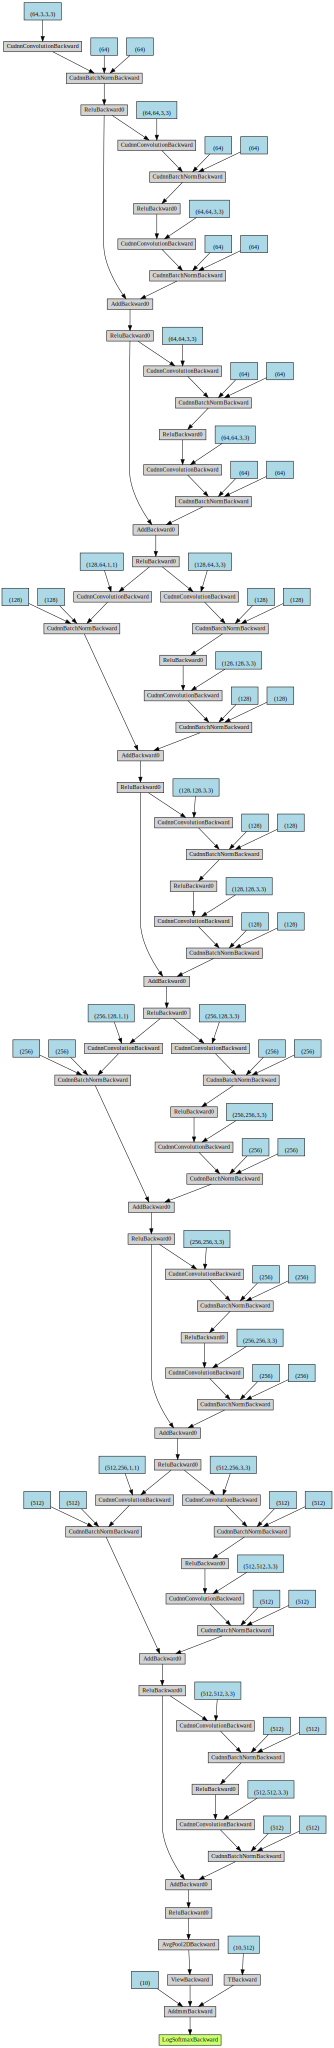

In [9]:
graphical_summary_cifar10(experiment.model)

In [10]:
experiment.run(epochs=25, momentum=0.9, lr=0.01, regularization=None, weight_decay=0.01)

TRAIN : epoch=0 train_loss=0.02392 correct/total=22246/50000 accuracy=44.49: 100%|██████████| 782/782 [00:58<00:00, 13.29it/s]
TEST :  epoch=0 test_loss=1.28199 correct/total=5555/10000 accuracy=55.55: 100%|██████████| 157/157 [00:03<00:00, 41.63it/s]
TRAIN : epoch=1 train_loss=0.01665 correct/total=31283/50000 accuracy=62.57: 100%|██████████| 782/782 [00:59<00:00, 13.18it/s]
TEST :  epoch=1 test_loss=1.10602 correct/total=6251/10000 accuracy=62.51: 100%|██████████| 157/157 [00:03<00:00, 41.32it/s]
TRAIN : epoch=2 train_loss=0.01362 correct/total=34857/50000 accuracy=69.71: 100%|██████████| 782/782 [00:59<00:00, 13.05it/s]
TEST :  epoch=2 test_loss=0.88557 correct/total=6975/10000 accuracy=69.75: 100%|██████████| 157/157 [00:03<00:00, 41.94it/s]
TRAIN : epoch=3 train_loss=0.01197 correct/total=36657/50000 accuracy=73.31: 100%|██████████| 782/782 [00:59<00:00, 13.08it/s]
TEST :  epoch=3 test_loss=0.68400 correct/total=7656/10000 accuracy=76.56: 100%|██████████| 157/157 [00:03<00:00, 41.

# Grad cam

In [0]:
target_layers = ['layer1.0.bn2', 'layer1.1.bn2', 'layer2.0.bn2', 'layer2.1.bn2', 'layer3.0.bn2', 'layer3.1.bn2', 'layer4.0.bn2', 'layer4.1.bn2']

In [0]:
grad_cam = GradCam(model=experiment.model, data_manager=experiment.data_manager, device=experiment.device, target_layers=target_layers)

Looking for horse in horse


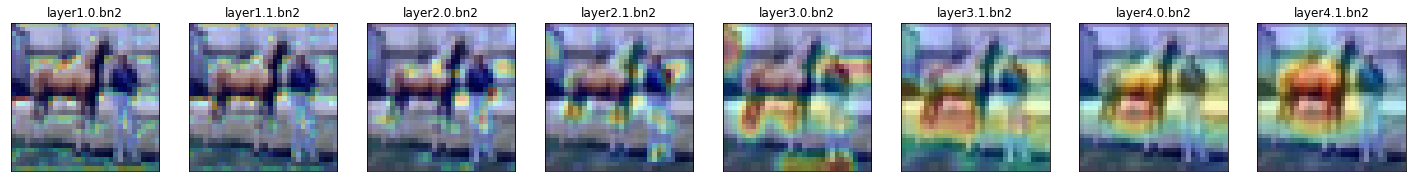

In [13]:
one_hot_encoded_class = 'horse'
required_class = 'horse'
overlays = grad_cam.get_overlays(required_class=required_class, one_hot_encoded_class=one_hot_encoded_class)
print(f'Looking for {one_hot_encoded_class} in {required_class}')
grad_cam.display_heatmaps(overlays)

Looking for car in car


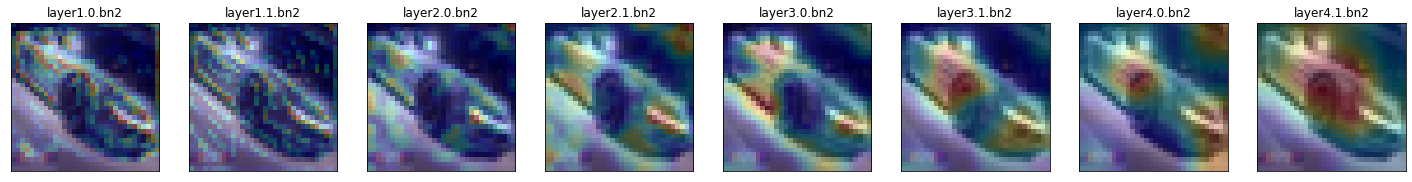

In [15]:
one_hot_encoded_class = 'car'
required_class = 'car'
overlays = grad_cam.get_overlays(required_class=required_class, one_hot_encoded_class=one_hot_encoded_class)
print(f'Looking for {one_hot_encoded_class} in {required_class}')
grad_cam.display_heatmaps(overlays)

Looking for car in horse


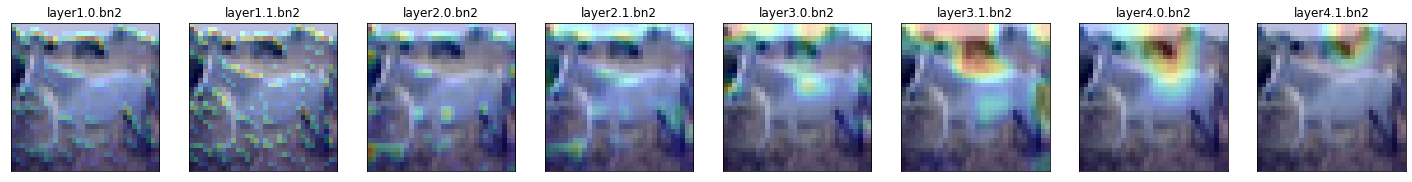

In [16]:
one_hot_encoded_class = 'car'
required_class = 'horse'
overlays = grad_cam.get_overlays(required_class=required_class, one_hot_encoded_class=one_hot_encoded_class)
print(f'Looking for {one_hot_encoded_class} in {required_class}')
grad_cam.display_heatmaps(overlays)

# Result
| Metric | Value |
| - | - |
| _Best train accuracy_| **92.32** |
| _Best test accuracy_| **90.1** |
| _Best epoch number_| **24** |
| _Parameter count_ | **11,173,962** |